**Boston House Price Prediction Project**

In [6]:
# Importing the Dependencies/Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics

In [7]:
# Load the Boston housing dataset from sklearn.dataset & print it
from sklearn.datasets import load_boston
house_price_dataset = sklearn.datasets.load_boston()
print(house_price_dataset)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

In [8]:
# Transform the Dataset into a Dataframe using pandas
# data = the data we want or the independent variables, also known as the x values
# feature_name = the column names of the data
# target = target variable or the price of the house or dependent variable, also known as the y values

df = pd.DataFrame(house_price_dataset.data, columns=house_price_dataset.feature_names) #df has only x values

In [9]:
# printing 1st five rows of our dataframe 
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [10]:
# add the target (price) column to the DataFrame
df['price'] = house_price_dataset.target  #now df has x values + y values

In [11]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [12]:
#checking the no. of rows & columns in dataframe
df.shape

(506, 14)

In [13]:
#checking the missing values
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
dtype: int64

In [14]:
# statistical measures from the dataframe
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Understanding the correlation between various features of the dataset
1. Positive correlation      
2. Negative correlation

In [15]:
correlation = df.corr()

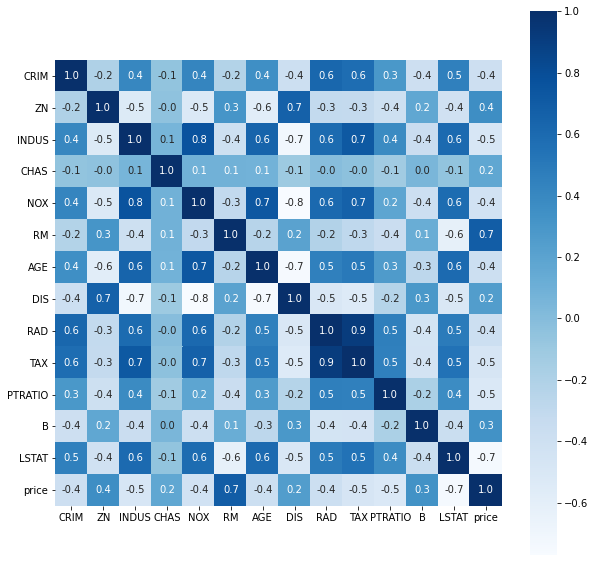

In [16]:
# constructing a heatmap to understand the correlation
plt.figure(figsize=(10,10)) 
sns.heatmap(correlation, cmap='Blues', annot=True, cbar=True, square=True, fmt='.1f', annot_kws={'size':10})

Splitting the data & target values

In [17]:
df_x = df.drop(['price'],axis=1)
df_y = df['price']

In [18]:
print(df_x)
print(df_y)

        CRIM    ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0    0.00632  18.0   2.31   0.0  0.538  ...  1.0  296.0     15.3  396.90   4.98
1    0.02731   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  396.90   9.14
2    0.02729   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  392.83   4.03
3    0.03237   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  394.63   2.94
4    0.06905   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  396.90   5.33
..       ...   ...    ...   ...    ...  ...  ...    ...      ...     ...    ...
501  0.06263   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  391.99   9.67
502  0.04527   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  396.90   9.08
503  0.06076   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  396.90   5.64
504  0.10959   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  393.45   6.48
505  0.04741   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  396.90   7.88

[506 rows x 13 columns]
0      24.0
1  

Splitting the data into Training data and Test data

In [51]:
# splitting the data into 20% testing & 80% training data
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state = 5) 

In [52]:
print(df_x.shape, x_train.shape, x_test.shape)

(506, 13) (404, 13) (102, 13)


Model initialising

In [53]:
# Initialise the linear regression model
reg = linear_model.LinearRegression()

In [54]:
# Train the model with our training data
reg.fit(x_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [55]:
# print the coefficients/weights for each feature/column of our model
print(reg.coef_) #f(x)= y = mx+na+c; m & n are coefficients here

[-1.30799852e-01  4.94030235e-02  1.09535045e-03  2.70536624e+00
 -1.59570504e+01  3.41397332e+00  1.11887670e-03 -1.49308124e+00
  3.64422378e-01 -1.31718155e-02 -9.52369666e-01  1.17492092e-02
 -5.94076089e-01]


In [56]:
# print the prediction on our test data
y_pred = reg.predict(x_test)
print(y_pred)

[37.56311787 32.14445143 27.06573629  5.67080633 35.09982577  5.85803701
 27.53708506 31.81019188 26.35634771 22.77208748 31.91183048 21.50224061
 23.70119983 33.3622504  28.51633591 14.39456899  0.19284025 18.66247155
 13.71004139 14.13408635  2.03263952 19.7280831  38.18657429 24.19760058
 31.30247973 11.14144544 25.03636951 23.27970871 22.49420127 20.52972594
 15.16513744  6.92553586 18.3557733  22.37179804 28.91287973 19.02980786
 30.19357214  8.74384915 40.86691522 34.53763591 20.70224878  2.59618963
 29.99590282 12.15704798 27.10186397 30.8052437  -6.24169079 19.84885777
 20.92973441 12.43523958 20.4949947  19.19231742 23.69073157 12.67998473
 17.14252424 25.04649176 34.77758126 15.23294903 28.22306193 21.08745388
 20.39506129 25.79476888 14.72463673 33.18635032 23.17771307 13.11057248
 19.23154617 24.61162961 21.50327036 22.00419172 20.5900874  27.19709085
 16.86361523 18.92610238 20.62344917 25.73255665 22.03855586 14.51899949
 34.3918044  18.5369776  23.38945015 41.36132839 23

In [57]:
# print the actual values 
print(y_test)

226    37.6
292    27.9
90     22.6
373    13.8
273    35.2
       ... 
349    26.6
212    22.4
156    13.1
480    23.0
248    24.5
Name: price, Length: 102, dtype: float64


In [58]:
# Check the model performance/accuracy using mean squared error (MSE)
print(np.mean( (y_pred-y_test)**2) )

20.86929218377074


In [59]:
# Check the model performance/accuracy using mean squared error (MSE) & sklearn.metrics
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_pred, y_test))

20.869292183770735


In [60]:
# R_squared_error 
score_1 = metrics.r2_score(y_pred, y_test)

# Mean absolute error
score_2 = metrics.mean_absolute_error(y_pred, y_test)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.7239358181605375
Mean Absolute Error :  3.2132704958423783


Visualizing the actual Prices and predicted prices

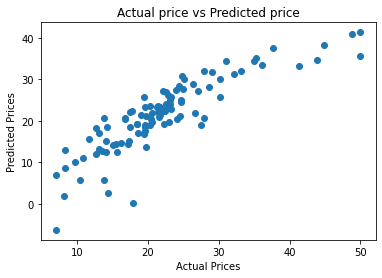

In [61]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual price vs Predicted price')
plt.show()